**Implementation of stochastic and batch grandient descent in python**

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Read csv file
df = pd.read_csv("homeprices_banglore.csv")

In [3]:
# print samples from data
df.sample(10)

,area,bedrooms,price
6,2732,4,135.0
17,1540,3,60.0
13,1100,2,40.0
3,1521,3,75.0
8,1310,3,50.0
18,2770,3,102.0
4,1200,2,51.0
1,2600,4,120.0
15,1175,2,42.0
5,1170,2,38.0


In [4]:
# Get information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      20 non-null     int64  
 1   bedrooms  20 non-null     int64  
 2   price     20 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 608.0 bytes


In [5]:
# Get statistical information about data
df.describe()

,area,bedrooms,price
count,20.000000,20.000000,20.000000
mean,1821.450000,2.900000,78.853500
std,864.615794,0.967906,43.761901
min,800.000000,1.000000,32.000000
25%,1173.750000,2.000000,41.500000
50%,1480.500000,3.000000,61.000000
75%,2633.000000,3.250000,106.500000
max,3700.000000,5.000000,167.000000


In [6]:
# get the maximum house  price
print(f"The hightest house price is : {df['price'].max()}")

The hightest house price is : 167.0


In [7]:
# get the minimum house  price
print(f"The minimum house  price: {df['price'].min()}")

The minimum house  price: 32.0


In [8]:
# Get the mean of house price
print(f"The Mean of house  price is : {df['price'].mean()}")

The Mean of house  price is : 78.8535


In [9]:
# Get maximum number of bedrooms
print(f"The maximum number of bedrooms on Data : {df['bedrooms'].max()}")

The maximum number of bedrooms on Data : 5


In [10]:
# Get minumum number of bedrooms
print(f"The minumum number of bedrooms on Data : {df['bedrooms'].min()}")

The minumum number of bedrooms on Data : 1


In [11]:
# Get the large area
print(f"The large area is  : {df['area'].max()}")

The large area is  : 3700


In [12]:
# Get the small area
print(f"The small area is  : {df['area'].min()}")

The small area is  : 800


In [13]:
# Scaling
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [14]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [15]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [16]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [17]:
#  implement batch gradient descent.
def batch(X, y_true, epochs, learning_rate = 0.01):
  features=X.shape[1]
  # intialization of weight
  w=np.ones(shape=(features))
  # intialization of bias
  b=0
  # number of samples
  samples=X.shape[0]
  # Append cost function
  cost_list = []
  epoch_list = []
  # iteration on each epoch
  for i in range(epochs):
    prediction= np.dot(w, X.T)+b
    w_grad = -(2/samples)*(X.T.dot(y_true-prediction))
    b_grad = -(2/samples)*np.sum(y_true-prediction)
    w=w-learning_rate*w_grad
    b=b-learning_rate*b_grad
    cost=np.mean(np.square(y_true-prediction))
    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list

In [18]:
# Test the function
w, b, cost, cost_list, epoch_list = batch(scaled_X,scaled_y.reshape(scaled_y.shape[0],),100)
w, b, cost

(array([0.82015506, 0.78816915]), -0.3027445983749067, 0.015813309382911644)

In [19]:
# Print list of cost
cost_list

[0.2768777174681,
 0.16573507027671064,
 0.10212908135956808,
 0.06564235879682481,
 0.04463022365578522,
 0.03245122421764872,
 0.025317339083010492,
 0.021067914076635823,
 0.01847041893523527,
 0.016821657535428185]

In [20]:
# Print list of epochs
epoch_list

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

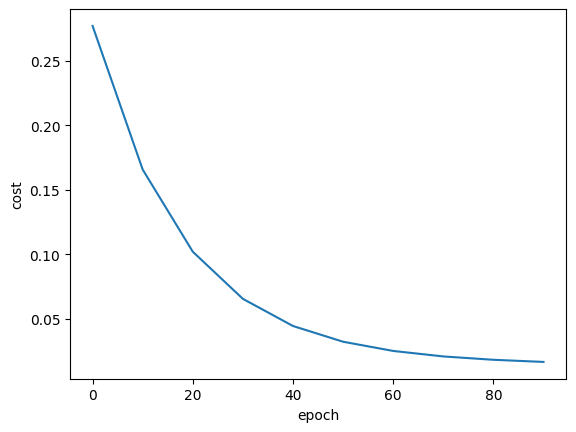

In [21]:
# Draw costs with epochs
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [27]:
# Stochastic Gradient Descent Implementation
import random
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

In [28]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70808025, 0.67513305]), -0.22876539024130318, 0.023997928773334197)

In [29]:
cost_list_sgd

[0.08174195018341542,
 0.18689565750886528,
 0.03040362141805627,
 0.013730681581174131,
 0.21911874890472108,
 0.028662096987523943,
 0.036631140768762366,
 0.0016447396780702199,
 0.10191967986526429,
 0.0698855085464502,
 0.04831027865784139,
 0.05003025862304125,
 0.007512678924487914,
 0.03704652768994501,
 0.011549216473876406,
 0.004128375686520886,
 0.009925183759876567,
 0.005730411017415254,
 0.0033451070102580496,
 0.005469770922003542,
 0.000649615704934854,
 0.018854935315194363,
 0.0004102816500153998,
 0.004785633003133336,
 0.015178257743501095,
 0.07502030635093347,
 0.0031076087993909952,
 0.0028098266963382267,
 0.021297336026695476,
 0.00089561645406262,
 0.0034117760259692823,
 0.011125221433886957,
 0.00746670108615147,
 0.0074933508686090555,
 0.010914438837627886,
 0.0065992717253415,
 0.0016091673701739372,
 0.0008081897729583962,
 0.01088306343022073,
 0.001789113502815989,
 0.009313504421979589,
 0.0006937717191027284,
 0.05165964763608499,
 0.007713673566662

In [30]:
epoch_list_sgd

[0,
 100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500,
 1600,
 1700,
 1800,
 1900,
 2000,
 2100,
 2200,
 2300,
 2400,
 2500,
 2600,
 2700,
 2800,
 2900,
 3000,
 3100,
 3200,
 3300,
 3400,
 3500,
 3600,
 3700,
 3800,
 3900,
 4000,
 4100,
 4200,
 4300,
 4400,
 4500,
 4600,
 4700,
 4800,
 4900,
 5000,
 5100,
 5200,
 5300,
 5400,
 5500,
 5600,
 5700,
 5800,
 5900,
 6000,
 6100,
 6200,
 6300,
 6400,
 6500,
 6600,
 6700,
 6800,
 6900,
 7000,
 7100,
 7200,
 7300,
 7400,
 7500,
 7600,
 7700,
 7800,
 7900,
 8000,
 8100,
 8200,
 8300,
 8400,
 8500,
 8600,
 8700,
 8800,
 8900,
 9000,
 9100,
 9200,
 9300,
 9400,
 9500,
 9600,
 9700,
 9800,
 9900]

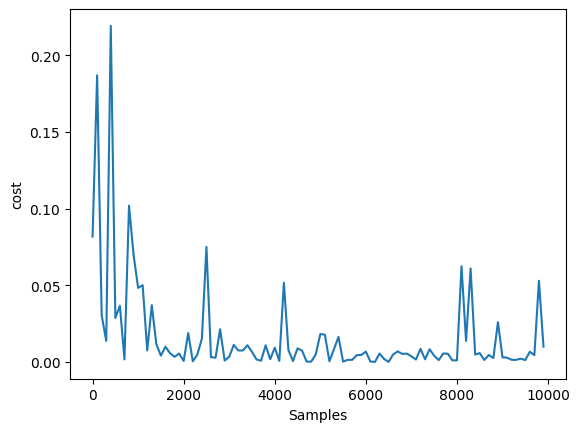

In [31]:
plt.xlabel("Samples")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)